## HW05

## Problem 1 
### Linear congruential random number generator:

#### 'gen_ random' function generates random number by using the following paramaters:
#### $a=5$ , $c=0 $ and $x0 =1$
#### 'gen_ random_ibm' function generates random number by using IBM parameters 

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot


In [10]:
# Random number genrator  with certain parameters 


def gen_random (x0,N):
    a = 5 
    M = 11
    x = np.zeros(N)
    x[-1] = x0
    for i in range (0,N):
        x[i] = (a * x[i-1] ) % M
    for i in range (0,N):
        x[i]=float(x[i]) / float (M)
    return x

# Random number genrator  with IBM parameters 

def gen_random_ibm (x0,N): 
    a = 65539 
    M =  2**31
    x = np.zeros(N)
    x[-1] = x0
    for i in range (0,N):
        x[i] = (a * x[i-1] ) % M
    for i in range (0,N):
        x[i]=float(x[i]) / float (M)
    return x




### $a=5$ , $c=0 $ 

100 93 3.72 0.5784073464102071
200 156 3.12 0.02159265358979301
400 312 3.12 0.02159265358979301
800 605 3.025 0.1165926535897932
1600 1255 3.1375 0.004092653589792938
3200 2500 3.125 0.016592653589793116
6400 5089 3.180625 0.03903234641020692
12800 10035 3.1359375 0.005655153589793294
25600 20080 3.1375 0.004092653589792938
51200 40433 3.158828125 0.01723547141020676
102400 80278 3.135859375 0.005733278589793223
204800 160816 3.1409375 0.0006551535897929561
409600 321753 3.142119140625 0.0005264870352070794
819200 643163 3.1404443359375 0.0011483176522930627
1638400 1287462 3.1432177734375 0.0016251198477070794
3276800 2574063 3.142166748046875 0.0005740944570820083


Text(0.5, 1.0, 'a=5 , M=11')

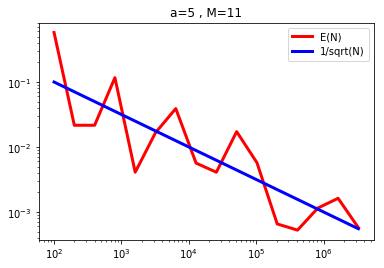

In [13]:
# Using gen_random

ngroups = 16

I = np.zeros(ngroups)
N = np.zeros(ngroups)
E = np.zeros(ngroups)

n0 = 100
x0=1 # seed 
y=[x0]

for i in range(ngroups):

    N[i] = n0
    x = gen_random(y[-1],n0)
    #print (x)
    y = gen_random(x[-1],n0)
    #print(y)
    I[i] = 0.
    Nin = 0
    for j in range(n0):
        if(y[j] < np.sqrt(1-x[j]**2)):
            Nin += 1
            
    I[i] = 4.*float(Nin)/float(n0)
    E[i] = abs(I[i]-np.pi)
    print (n0,Nin,I[i],E[i])
    n0 *= 2
    
            
pyplot.plot(N,E,ls='-',c='red',lw=3,label='E(N)');
pyplot.plot(N,1/np.sqrt(N),ls='-',c='blue',lw=3, label='1/sqrt(N)');
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.legend()
pyplot.title('a=5 , M=11')

### IBM parameters 

100 80 3.2 0.05840734641020706
200 158 3.16 0.018407346410207026
400 323 3.23 0.08840734641020687
800 627 3.135 0.006592653589793329
1600 1258 3.145 0.0034073464102069018
3200 2465 3.08125 0.060342653589793294
6400 4995 3.121875 0.01971765358979294
12800 10105 3.1578125 0.016219846410206795
25600 20167 3.15109375 0.009501096410206689
51200 40386 3.15515625 0.01356359641020699
102400 80490 3.144140625 0.002547971410206795
204800 160671 3.13810546875 0.003487184839793045
409600 321596 3.1405859375 0.0010067160897930805
819200 643852 3.14380859375 0.002215940160207097
1638400 1285697 3.13890869140625 0.002683962183543276
3276800 2574843 3.143118896484375 0.0015262428945819195


Text(0.5, 1.0, 'IBM parameters')

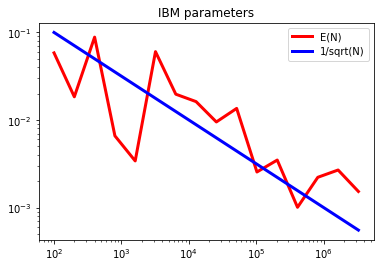

In [14]:
ngroups = 16

I = np.zeros(ngroups)
N = np.zeros(ngroups)
E = np.zeros(ngroups)

n0 = 100
x0=1 # seed 
y=[x0]
for i in range(ngroups):

    N[i] = n0
    x = gen_random_ibm(y[-1],n0)
    y = gen_random_ibm(x[-1],n0)
    I[i] = 0.
    Nin = 0
    for j in range(n0):
        if(y[j] < np.sqrt(1-x[j]**2)):
            Nin += 1
            
    I[i] = 4.*float(Nin)/float(n0)
    E[i] = abs(I[i]-np.pi)
    print (n0,Nin,I[i],E[i])
    n0 *= 2
    
            
pyplot.plot(N,E,ls='-',c='red',lw=3,label='E(N)');
pyplot.plot(N,1/np.sqrt(N),ls='-',c='blue',lw=3, label='1/sqrt(N)');
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.legend()
pyplot.title('IBM parameters')

## Problem 2 


$\int _0^1{x^2dx} = \frac{1}{3}= 0.3333$
### Simple MC integration :

In [24]:
#Boundries
a=0
b=1
h=1

N=1000000 # total number of points 
Nin=0 # number of acceptance
x=np.random.random(N)
y=np.random.random(N)

for i in range (0,N):
    if (y[i] < x[i]**2):
        Nin += 1
        
I = (b-a) * h * Nin / N 

print ('*****************\n I =',I,'\n*****************')



*****************
 I = 0.3332763 
*****************


### Importance sampling 
 $p(x)=2x$ 
 
 $\int _0^1{p(x) dx} =1 $
 
 $y(x)= \sqrt x$
 
 $ I = \frac{1}{N} \sum_{i=1}^N \frac{y_i^2}{2y_i} =  \frac{1}{N} \sum_{i=1}^N \frac{y_i}{2}$
 

In [34]:
N=1000000

x=np.random.random(N)

y=np.sqrt(x)

I =0 

for i in range(0,N):
    I += y[i]/2

I=I/N

print ('*************************\n I =',I,'\n*************************')


*************************
 I = 0.3332862253656083 
*************************


## Problem 3


$\int _0^1{\sqrt x dx} = \frac{2}{3}= 0.666667$
### Simple MC integration :

In [36]:
#Boundries
a=0
b=1
h=1

N=1000000 # total number of points 
Nin=0 # number of acceptance
x=np.random.random(N)
y=np.random.random(N)

for i in range (0,N):
    if (y[i] < np.sqrt(x[i])):
        Nin += 1
        
I = (b-a) * h * Nin / N 

print ('*****************\n I =',I,'\n*****************')



*****************
 I = 0.666619 
*****************


### Generating random number with the following distribution  (Metropolis Algorithm): 
### $p(x)=N (1-e^{-ax}) \ , \ N = (1+ \frac{e^{-a}-1}{a}) $

[ 0.6         0.47945946  0.50775645 ... 37.15371712 37.37232642
 37.25949244]


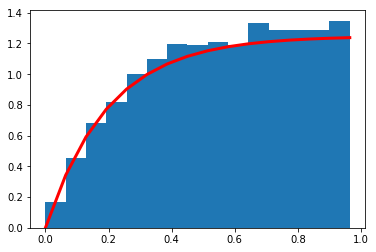

In [70]:
N = 200000

x = np.zeros(N)
delta = 0.0643
a=5

def metropolis(xold):
    xtrial = np.random.random()    
    xtrial = xold+(2*xtrial-1)*delta
    weight = (1 - np.exp(-a*xtrial)) / (1 - np.exp(-a*xold))
    xnew = xold
    if(weight >= 1): #Accept
        xnew = xtrial
    else:
        r = np.random.random()
        if(r <= weight): #Accept
            xnew = xtrial
    return xnew

###
x[0] = 0.6

for i in range(1,N):
    x0 = x[i-1]
    for j in range(10):
        if (x0 != 0 ):
             x0 = metropolis(x0)
    x[i] = metropolis(x0)

binwidth=delta
pyplot.hist(x,bins=np.arange(0,1, binwidth),density=True);

norm = a / (a - 1 + np.exp(-a))

pyplot.plot(np.arange(0,1,binwidth),norm*(1 - np.exp(-a*np.arange(0,1, binwidth))),ls='-',c='red',lw=3)


### Importance sampling 
$p(x)=N (1-e^{-ax}) \ , \ N = (1+ \frac{e^{-a}-1}{a}) $
 
 $\int _0^1{p(x) dx} =1 $
 $f(x)= \sqrt x$
 
 $ I = \frac{1}{N} \sum_{i=1}^N \frac{\sqrt x}{N (1-e^{-ax})}=0.666667 $
 

In [71]:

I =0 
n=0
for i in range(0,N):
    if (x[i] <= 1 and x[i] >=0): 
        n +=1
        I += np.sqrt(x[i])/(norm*(1-np.exp(-a * x[i]))) 

I=I/n

print ('*************************\n I =',I,'\n*************************')


*************************
 I = 0.6683676042896608 
*************************


### Generating random number with the following distribution  (Von Newmann rejection): 
### $p(x)=N (1-e^{-ax}) \ , \ N = (1+ \frac{e^{-a}-1}{a}) $

Acceptance Ratio:  0.7212


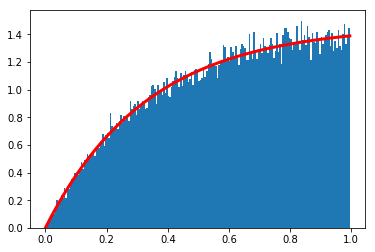

In [31]:
N = 100000
a=3
norm = a / (a - 1 + np.exp(-a))

xmax = 1
ymax = norm * (1-np.exp(-a * xmax))

rx = np.random.random(N)*xmax
ry = np.random.random(N)*ymax

values = []

Nin = 0
for i in range(0,N):
    if(ry[i] <= (norm * (1-np.exp(-a * rx[i])))):
        # Accept
        values.append(rx[i])
        Nin += 1
        
x = np.asarray(values)

print("Acceptance Ratio: ",Nin/float(N))

binwidth=1/200
#pyplot.hist(rx,bins=np.arange(0.,100., binwidth),density=True);
pyplot.hist(x,bins=np.arange(0.,xmax, binwidth),density=True);
pyplot.plot(np.arange(0.,xmax,binwidth),norm*(1 - np.exp(-a*np.arange(0,xmax, binwidth))),ls='-',c='red',lw=3);


### Importance sampling 

In [33]:
I =0 

for i in range(0,len(x)):
    I += np.sqrt(x[i])/(norm*(1-np.exp(-a * x[i]))) 

I=I/len(x)

print ('*************************\n I =',I,'\n*************************')


*************************
 I = 0.6666184676698907 
*************************


### dependence of variance on 'a' using Van Neumann rejection 

Text(0, 0.5, 'Variance')

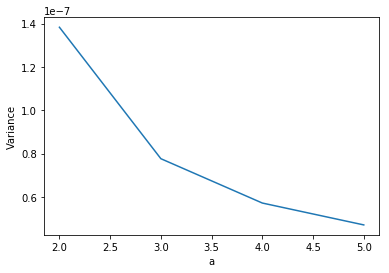

In [37]:
Ni=10 # Number of iteration to calculate the integral 
N = 100000 # number of points 
x = np.zeros(N) # random numbers 
aarray=np.arange(2,6,1)
variance=np.zeros(len(aarray))

for l in range(len(aarray)):
        a=aarray[l]
        norm = a / (a - 1 + np.exp(-a))
        xmax = 1
        ymax = norm * (1-np.exp(-a * xmax))
        I=0
        I2=0

        for k in range (Ni):
            rx = np.random.random(N)*xmax
            ry = np.random.random(N)*ymax
            values = []
            Ii=0
            for i in range(0,N):
                if(ry[i] <= (norm * (1-np.exp(-a * rx[i])))):
                    # Accept
                    values.append(rx[i])
            x = np.asarray(values)
            for i in range(0,len(x)):
                Ii += np.sqrt(x[i])/(norm*(1-np.exp(-a * x[i]))) 
            I += Ii/len(x)
            I2 += (Ii/len(x))**2
            
        var = I2/Ni - (I/Ni)**2
        variance[l] = var 
    
pyplot.plot(aarray,variance)  
pyplot.xlabel('a')
pyplot.ylabel('Variance')
  